In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter


%matplotlib inline

# Terrorism in the US

In [4]:
# Reading the data set

df = pd.read_excel("globalterrorism.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


First of all, let's create a column for date, so we can turn it into a datetime.

In [88]:
df['date'] = df.iyear.map(str) + "-" + df.imonth.map(str) + "-" + df.iday.map(str)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-7-2
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1970-0-0
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-1-0
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-1-0
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-1-0


# A few general questions 

## Where did terrorist attacks happen the most since 1970?

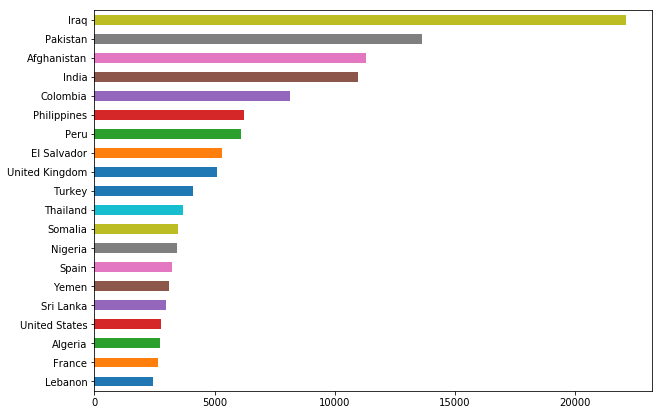

In [4]:
# per country 

df.country_txt.value_counts().head(20).sort_values(ascending=True).plot(kind='barh', figsize=(10,7))

In [5]:
# per region 

df.region_txt.value_counts().head(20).sort_values(ascending=False)#.plot(kind='barh', figsize=(10,7))

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

**What was the most common target?** 

In [6]:
df.target1.value_counts().head(20)

Civilians         5810
Unknown           4892
Soldiers          2688
Patrol            2616
Checkpoint        2562
Vehicle           2397
Officers          1554
Military Unit     1533
Village           1406
Bus               1308
Unit              1193
Police Station    1113
Convoy            1053
Market            1031
Office             809
House              761
Base               735
Checkpost          661
Bank               649
Post               621
Name: target1, dtype: int64

**What were the most used weapons?**

In [7]:
df.weaptype1_txt.value_counts().head(20)

Explosives/Bombs/Dynamite                                                      86704
Firearms                                                                       55273
Unknown                                                                        13852
Incendiary                                                                     10459
Melee                                                                           3338
Chemical                                                                         293
Sabotage Equipment                                                               130
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      116
Other                                                                            104
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

**What type of attacks were these?**

In [8]:
df.attacktype1_txt.value_counts().head(20)

Bombing/Explosion                      83073
Armed Assault                          40223
Assassination                          18402
Hostage Taking (Kidnapping)            10233
Facility/Infrastructure Attack          9581
Unknown                                 6425
Unarmed Assault                          913
Hostage Taking (Barricade Incident)      902
Hijacking                                598
Name: attacktype1_txt, dtype: int64

**Were these attacks successful (did the terrorist achieved his goal)?**

In [9]:
df.success.value_counts().head(20)

1    152701
0     17649
Name: success, dtype: int64

**Where did people die the most?**

In [10]:
df.groupby('country_txt').nkill.sum().sort_values(ascending=False).head(20)

country_txt
Iraq           71082.0
Afghanistan    33146.0
Pakistan       22734.0
Nigeria        20665.0
India          18842.0
Sri Lanka      15528.0
Colombia       14600.0
Syria          13132.0
Peru           12763.0
El Salvador    12053.0
Algeria        11091.0
Nicaragua      10598.0
Philippines     9058.0
Somalia         8254.0
Yemen           8011.0
Turkey          6664.0
Guatemala       5167.0
Russia          4246.0
Burundi         4182.0
Lebanon         4038.0
Name: nkill, dtype: float64

**What is the most commom mode for claim of responsibilty?**

In [11]:
df.claimmode_txt.value_counts().head(20)

Personal claim                   4128
Posted to website, blog, etc.    3689
Unknown                          3673
Call (post-incident)             1724
Note left at scene                980
E-mail                            797
Other                             451
Letter                            329
Video                             308
Call (pre-incident)               169
Name: claimmode_txt, dtype: int64

**Interesting, but still too general. Let's look at the data from each decade individually.**

In [5]:
df_70 = df[(df.iyear >= 1970) & (df.iyear < 1980)]

In [14]:
df_80 = df[(df.iyear >= 1980) & (df.iyear < 1990)]

In [15]:
df_90 = df[(df.iyear >= 1990) & (df.iyear < 2000)]

In [16]:
df_00 = df[(df.iyear >= 2000) & (df.iyear < 2010)]

In [17]:
df_10 = df[df.iyear >= 2010]

In [17]:
df_70.country_txt.value_counts().head(20)

United Kingdom        1635
United States         1471
Italy                 1022
Spain                  901
Turkey                 484
France                 473
El Salvador            445
Colombia               419
Argentina              324
Nicaragua              290
West Germany (FRG)     273
Israel                 179
Iran                   177
Greece                 143
Philippines            124
Guatemala              121
Mexico                 114
Lebanon                100
Japan                   75
Chile                   72
Name: country_txt, dtype: int64

In [18]:
df_80.country_txt.value_counts().head(20)

Peru                        4223
El Salvador                 4123
Colombia                    2951
Chile                       1744
Guatemala                   1483
Nicaragua                   1481
Spain                       1341
Sri Lanka                   1319
United Kingdom              1317
Lebanon                     1248
India                       1228
South Africa                 999
Philippines                  918
France                       855
United States                517
Israel                       455
Turkey                       340
West Bank and Gaza Strip     315
Argentina                    302
Italy                        299
Name: country_txt, dtype: int64

In [19]:
df_90.country_txt.value_counts().head(20)

Colombia                    2833
India                       1788
Peru                        1781
Turkey                      1665
Pakistan                    1604
Algeria                     1389
United Kingdom              1214
Philippines                  946
France                       919
South Africa                 845
Sri Lanka                    841
El Salvador                  752
West Bank and Gaza Strip     597
Spain                        586
Germany                      531
Lebanon                      521
Bangladesh                   473
Chile                        454
Guatemala                    427
Egypt                        424
Name: country_txt, dtype: int64

In [20]:
df_00.country_txt.value_counts().head(20)

Iraq                        5170
India                       2566
Pakistan                    1979
Afghanistan                 1948
Thailand                    1227
Algeria                     1120
Philippines                 1022
Colombia                    1016
Russia                       973
Sri Lanka                    768
Nepal                        594
Israel                       570
West Bank and Gaza Strip     550
Somalia                      486
Spain                        400
Indonesia                    343
United Kingdom               316
Greece                       281
Turkey                       260
Nigeria                      257
Name: country_txt, dtype: int64

In [21]:
df_10.country_txt.value_counts().head(20)

Iraq                        16799
Pakistan                     9838
Afghanistan                  9234
India                        5372
Philippines                  3202
Nigeria                      3080
Yemen                        2906
Somalia                      2827
Thailand                     2215
Libya                        2037
Syria                        1800
Egypt                        1678
Ukraine                      1615
Turkey                       1357
Colombia                      944
Bangladesh                    879
Russia                        857
West Bank and Gaza Strip      654
Sudan                         640
United Kingdom                616
Name: country_txt, dtype: int64

**Let's create a dataframe for terrorist attacks that happened in the US.** 

We're going to do a bunch of analysis with it later.

In [9]:
df_usa = df[df.country_txt == 'United States']
df_usa.shape

# There were 2757 attacks in the US from 1970 to 2016.

(2757, 135)

**What were the most targeted provinces?**

In [23]:
df_usa.provstate.value_counts().head(15)

California              586
New York                503
Puerto Rico             247
Florida                 153
Illinois                110
Washington               98
District of Columbia     83
Oregon                   65
Texas                    59
Massachusetts            57
Ohio                     51
New Jersey               47
Michigan                 44
Colorado                 44
Virginia                 39
Name: provstate, dtype: int64

Let's plot that.

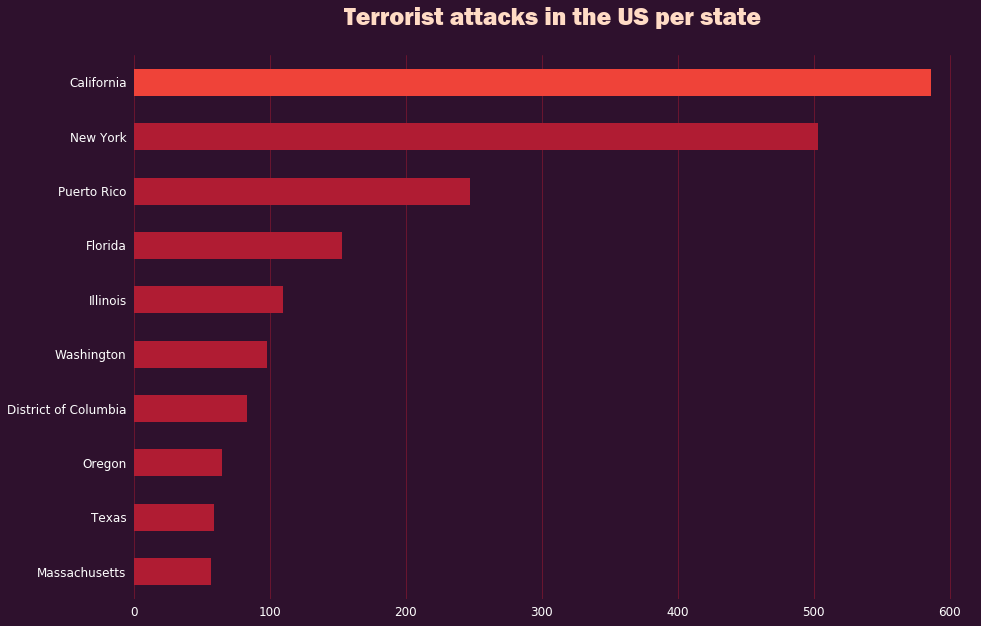

In [82]:
#plt.style.use('dark_background')

bar_colors = ['#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#ef4339']

ax = df_usa.provstate.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(15,10))

ax.set_title('Terrorist attacks in the US per state', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("attacks-state.pdf")

In [180]:
df_usa.city.value_counts().head(10)

New York City    448
San Juan         115
Los Angeles      109
San Francisco    98 
Miami            85 
Washington       84 
Chicago          56 
Seattle          39 
Berkeley         33 
Denver           22 
Name: city, dtype: int64

Let's plot that.

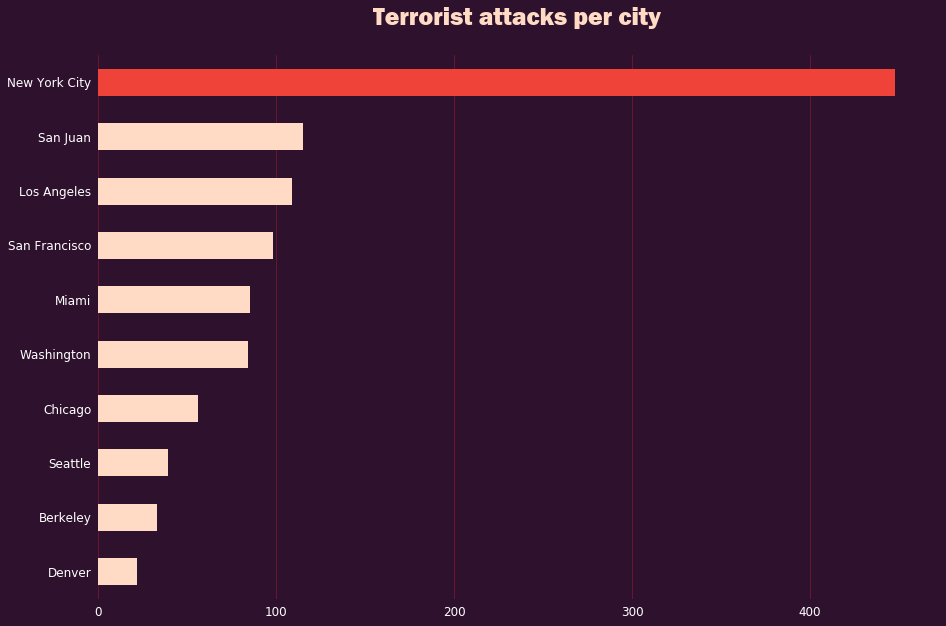

In [83]:
bar_colors = ['#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ef4339']

ax = df_usa.city.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', x='city', color=bar_colors, figsize=(15,10))

ax.set_title('Terrorist attacks per city', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("attacks-city.pdf")

**New York City has been target of more than 400 attacks! That is surprising. Let's look into it.**

In [10]:
df_nyc = df_usa[df_usa.city == 'New York City']
df_nyc

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
17,197001120001,1970,1,12,NaN,0,NaT,217,United States,1,...,"One half hour after the bomb explosion, an ano...","""Blast Damages Flatbush School,"" New York Time...","Linda Greenhouse, ""Madison School Puzzled By B...",Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,NaN
30,197001250002,1970,1,25,NaN,0,NaT,217,United States,1,...,Police do not believe that this attack was rel...,Committee on Government Operations United Stat...,"Martin Arnold, ""Harlem Area Sealed Off As Poli...","""2 Policemen Wounded by Sniper Fire,"" New York...",Hewitt Project,-9,-9,0,-9,NaN
32,197001260003,1970,1,26,NaN,0,NaT,217,United States,1,...,Police do not believe that this attack was rel...,Committee on Government Operations United Stat...,"Martin Arnold, ""Harlem Area Sealed Off As Poli...","""2 Policemen Wounded by Sniper Fire,"" New York...",Hewitt Project,-9,-9,0,-9,NaN
43,197002020001,1970,2,2,NaN,0,NaT,217,United States,1,...,NaN,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",NaN,Hewitt Project,-9,-9,0,-9,NaN
44,197002030001,1970,2,3,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002030002. ...,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",NaN,Hewitt Project,-9,-9,0,-9,"197002030001, 197002030002"
45,197002030002,1970,2,3,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002030001. ...,Committee on Government Operations United Stat...,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",Hewitt Project,-9,-9,0,-9,"197002030002, 197002030001"
55,197002080001,1970,2,8,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002080002 an...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","William Sater, ""Puerto Rican Terrorists: A Pos...",Hewitt Project,0,1,0,1,"197002080001, 197002080002, 197002090003"
56,197002080002,1970,2,8,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002080001 an...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","William Sater, ""Puerto Rican Terrorists: A Pos...",Hewitt Project,0,1,0,1,"197002080002, 197002080001, 197002090003"
57,197002090003,1970,2,9,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002080001 an...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","""Bomb Case Figure Found Guilty Here,"" New York...",Hewitt Project,0,1,0,1,"197002090003, 197002080001, 197002080002"
64,197002150001,1970,2,15,NaN,0,NaT,217,United States,1,...,This was one of many bank bombings in New York...,"""Door of Chase Bank Is Damaged By Bomb,"" New Y...","""Bank Blasted,"" The Montreal Gazette, July 16,...","Marcia McKnight Trick, ""Chronology of Incident...",Hewitt Project,-9,-9,0,-9,NaN


**In what year did these happen the most?**

In [129]:
df_nyc.iyear.value_counts()

1970    82
1976    43
1977    40
1971    38
1972    27
1973    22
1975    22
1982    22
1974    20
1978    20
1981    15
1979    11
1980    11
2001     8
1986     7
1994     7
1985     7
2016     6
1984     5
1983     5
1992     4
1997     4
1990     4
2012     4
2014     3
2010     2
2015     1
2008     1
2013     1
2002     1
2007     1
2005     1
1996     1
1995     1
1989     1
Name: iyear, dtype: int64

Let's plot all these attacks per year.

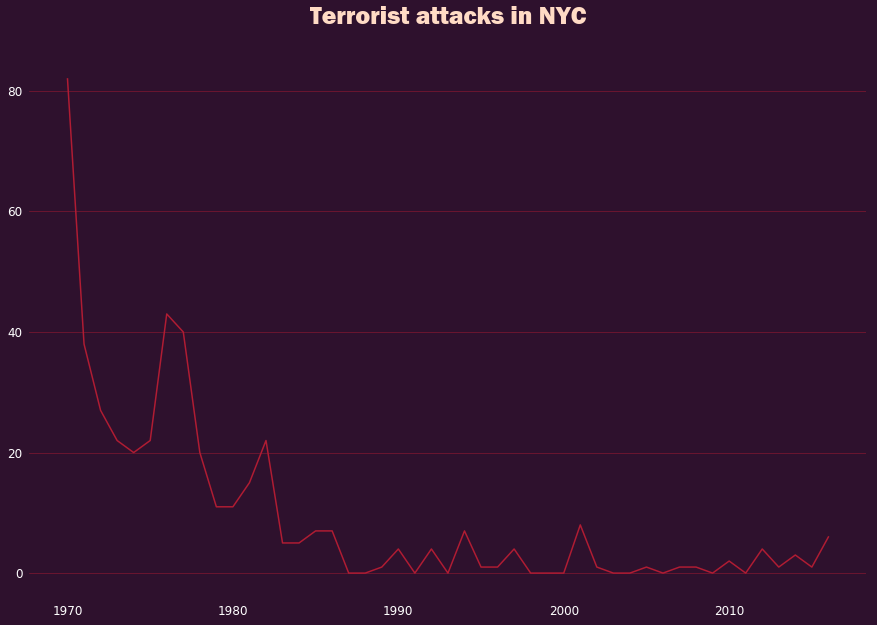

In [170]:
ax = df_nyc.resample('Y', on='year').count().date.plot(figsize=(15,10), color='#b01c33')


ax.set_title('Terrorist attacks in NYC', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='y', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.label.set_visible(False)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("attacks-nyc-year.pdf")

**Now let's create a dataframe for attacks that happened in NYC in 1970, so we can look into it.**

In [131]:
df_nyc_1970 = df_nyc[df_nyc.iyear == 1970]
df_nyc_1970

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
17,197001120001,1970,1,12,NaN,0,NaT,217,United States,1,...,"""Blast Damages Flatbush School,"" New York Time...","Linda Greenhouse, ""Madison School Puzzled By B...",Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,NaN,0 1970\n1 1970\n2 1970...
30,197001250002,1970,1,25,NaN,0,NaT,217,United States,1,...,Committee on Government Operations United Stat...,"Martin Arnold, ""Harlem Area Sealed Off As Poli...","""2 Policemen Wounded by Sniper Fire,"" New York...",Hewitt Project,-9,-9,0,-9,NaN,0 1970\n1 1970\n2 1970...
32,197001260003,1970,1,26,NaN,0,NaT,217,United States,1,...,Committee on Government Operations United Stat...,"Martin Arnold, ""Harlem Area Sealed Off As Poli...","""2 Policemen Wounded by Sniper Fire,"" New York...",Hewitt Project,-9,-9,0,-9,NaN,0 1970\n1 1970\n2 1970...
43,197002020001,1970,2,2,NaN,0,NaT,217,United States,1,...,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",NaN,Hewitt Project,-9,-9,0,-9,NaN,0 1970\n1 1970\n2 1970...
44,197002030001,1970,2,3,NaN,0,NaT,217,United States,1,...,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",NaN,Hewitt Project,-9,-9,0,-9,"197002030001, 197002030002",0 1970\n1 1970\n2 1970...
45,197002030002,1970,2,3,NaN,0,NaT,217,United States,1,...,Committee on Government Operations United Stat...,"""Alexander's Stores Survive 2 Bombs With No Da...","""Fire Bomb is Found in Alexander Store,"" New Y...",Hewitt Project,-9,-9,0,-9,"197002030002, 197002030001",0 1970\n1 1970\n2 1970...
55,197002080001,1970,2,8,NaN,0,NaT,217,United States,1,...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","William Sater, ""Puerto Rican Terrorists: A Pos...",Hewitt Project,0,1,0,1,"197002080001, 197002080002, 197002090003",0 1970\n1 1970\n2 1970...
56,197002080002,1970,2,8,NaN,0,NaT,217,United States,1,...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","William Sater, ""Puerto Rican Terrorists: A Pos...",Hewitt Project,0,1,0,1,"197002080002, 197002080001, 197002090003",0 1970\n1 1970\n2 1970...
57,197002090003,1970,2,9,NaN,0,NaT,217,United States,1,...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","""Bomb Case Figure Found Guilty Here,"" New York...",Hewitt Project,0,1,0,1,"197002090003, 197002080001, 197002080002",0 1970\n1 1970\n2 1970...
64,197002150001,1970,2,15,NaN,0,NaT,217,United States,1,...,"""Door of Chase Bank Is Damaged By Bomb,"" New Y...","""Bank Blasted,"" The Montreal Gazette, July 16,...","Marcia McKnight Trick, ""Chronology of Incident...",Hewitt Project,-9,-9,0,-9,NaN,0 1970\n1 1970\n2 1970...


**Why there were so many attacks in 1970?**

In [135]:
pd.set_option('display.max_colwidth', -1)
df_nyc_1970.motive.value_counts()  

Revolutionary movement against the financial establishment                                                                                                                                                   4
To fight imperialism and exploitation.                                                                                                                                                                       3
Revenge for the firebombing of a Jewish Community Center in Brooklyn                                                                                                                                         2
To kill police                                                                                                                                                                                               2
Protest the draft and the US military                                                                                                                                       

Apparently, the majority of the attacks in 1970 were related to the Vietnam War.

In [138]:
# How about in 1976 (the second year with the biggest number of attacks)?

df_nyc[df_nyc.iyear == 1976].motive.value_counts()

FALN members claimed they were protesting the presence of Puerto Rican delegation at the Democratic National Convention.                                                                     6
Unknown                                                                                                                                                                                      5
To protest the involvement of banks which participated in the Arab boycott of Israel.                                                                                                        3
To protest Cuban institutions operating in the United States                                                                                                                                 1
FALN members were protesting the appearance of Puerto Rican Governor, Rafael Hernandez Colon, at a political fund-raising dinner at the Hilton Hotel, to raise money for his re-election.    1
Name: motive, dtype: int64

In [141]:
# And finally in 1977

df_nyc[df_nyc.iyear == 1977].motive.value_counts()

The May 19 Communist Order consisted of Revolutionary Leftists attempting to "expropriate" funds from the establishment in order to improve to the conditions of the poor.  The armed robberies were viewed as a way to procure weapons and safe houses that would be used in the armed struggle against those in power.                                                                                                                                                                              1
In the note left by FALN at a telephone booth by the FBI building, members demanded that officials cease the federal investigation of two women lay ministers of the Episcopal Church, who worked for the National Commission on Hispanic Affairs.  FBI officials believed the women had information about the only known member of FALN, Carlos Albert Torres, and were thus imprisoned on charges of contempt, despite their denials of any knowledge of FALN or the activities of FALN members.    1
Name: motive, dtype: int

**Were these attacks successful? How many people died?**

In [128]:
df_nyc.success.value_counts()

# 352 attacks were successful 

1    352
0     96
Name: success, dtype: int64

In [179]:
df_nyc.nkill.value_counts()

# But in the majority of the attacks there were no deaths. 

0.0       405
1.0       23 
2.0       6  
4.0       2  
1382.0    1  
11.0      1  
Name: nkill, dtype: int64

In [181]:
df_nyc.groupby('iyear').nkill.value_counts()

iyear  nkill 
1970   0.0       81
1971   0.0       34
       1.0       3 
       2.0       1 
1972   0.0       24
       1.0       2 
       2.0       1 
1973   0.0       17
       1.0       3 
       2.0       2 
1974   0.0       18
       4.0       1 
1975   0.0       20
       4.0       1 
       11.0      1 
1976   0.0       41
       1.0       2 
1977   0.0       35
       1.0       1 
1978   0.0       20
1979   0.0       11
1980   0.0       10
       1.0       1 
1981   0.0       13
       1.0       2 
1982   0.0       20
       1.0       1 
1983   0.0       4 
       1.0       1 
1984   0.0       5 
1985   0.0       7 
1986   0.0       5 
1990   0.0       3 
       1.0       1 
1992   0.0       3 
       1.0       1 
1994   0.0       5 
       1.0       2 
1995   0.0       1 
1996   0.0       1 
1997   0.0       3 
       1.0       1 
2001   0.0       6 
       1.0       1 
       1382.0    1 
2002   0.0       1 
2005   0.0       1 
2007   0.0       1 
2008   0.0       1 
2010  

In [189]:
df_nyc_1970.nkill.sum()

0.0

Interesting. Even though 1970 is the year with the biggest number of attacks, no one died. 

In [186]:
# What else happened in 2001 in NYC besides the WTC attack? 

df_nyc[df_nyc['iyear'] == 2001]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,year
71886,200103020006,2001,3,2,NaN,0,NaT,217,United States,1,...,"""ALF Claims Fire Attack On Meat Trucks,"" Frontline Information Service, March 5, 2001.",NaN,CETIS,0,1,0,1,NaN,"0 1970\n1 1970\n2 1970\n3 1970\n4 1970\n5 1970\n6 1970\n7 1970\n8 1970\n9 1970\n10 1970\n11 1970\n12 1970\n13 1970\n14 1970\n15 1970\n16 1970\n17 1970\n18 1970\n19 1970\n20 1970\n21 1970\n22 1970\n23 1970\n24 1970\n25 1970\n26 1970\n27 1970\n28 1970\n29 1970\n ... \n170320 2016\n170321 2016\n170322 2016\n170323 2016\n170324 2016\n170325 2016\n170326 2016\n170327 2016\n170328 2016\n170329 2016\n170330 2016\n170331 2016\n170332 2016\n170333 2016\n170334 2016\n170335 2016\n170336 2016\n170337 2016\n170338 2016\n170339 2016\n170340 2016\n170341 2016\n170342 2016\n170343 2016\n170344 2016\n170345 2016\n170346 2016\n170347 2016\n170348 2016\n170349 2016\nName: iyear, Length: 170350, dtype: int64-0 7\n1 0\n2 1\n3 1\n4 1\n5 1\n6 1\n7 1\n8 1\n9 1\n10 1\n11 1\n12 1\n13 1\n14 1\n15 1\n16 1\n17 1\n18 1\n19 1\n20 1\n21 1\n22 1\n23 1\n24 1\n25 1\n26 1\n27 1\n28 1\n29 1\n ..\n170320 12\n170321 12\n170322 12\n170323 12\n170324 12\n170325 12\n170326 12\n170327 12\n170328 12\n170329 12\n170330 12\n170331 12\n170332 12\n170333 12\n170334 12\n170335 12\n170336 12\n170337 12\n170338 12\n170339 12\n170340 12\n170341 12\n170342 12\n170343 12\n170344 12\n170345 12\n170346 12\n170347 12\n170348 12\n170349 12\nName: imonth, Length: 170350, dtype: int64-0 2\n1 0\n2 0\n3 0\n4 0\n5 1\n6 2\n7 2\n8 2\n9 3\n10 1\n11 6\n12 8\n13 9\n14 9\n15 10\n16 11\n17 12\n18 12\n19 13\n20 14\n21 15\n22 19\n23 19\n24 19\n25 20\n26 21\n27 22\n28 22\n29 25\n ..\n170320 31\n170321 31\n170322 30\n170323 31\n170324 31\n170325 31\n170326 31\n170327 31\n170328 31\n170329 31\n170330 31\n170331 31\n170332 31\n170333 31\n170334 31\n170335 31\n170336 31\n170337 31\n170338 31\n170339 31\n170340 31\n170341 31\n170342 31\n170343 30\n170344 31\n170345 31\n170346 31\n170347 31\n170348 31\n170349 30\nName: iday, Length: 170350, dtype: int64",2001-01-01
73055,200109110005,2001,9,11,NaN,0,NaT,217,United States,1,...,"Lindsay Kines, “United States on high alert after thousands feared dead: Airlines initially blame hijackers for attacks on the Pentagon in Washington, New York's World Trade Center,” The Vancouver Sun, September 11, 2001.","Joe Frolick, “Hijackers Ram Two Airliners Into World Trade Center, Third Plane Slams Into Pentagon, Fourth Crashes Near Pittsburgh; Thousands Die; Bush Vows Swift Revenge,” The Plain Dealer, September 12, 2001.",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 200109110007","0 1970\n1 1970\n2 1970\n3 1970\n4 1970\n5 1970\n6 1970\n7 1970\n8 1970\n9 1970\n10 1970\n11 1970\n12 1970\n13 1970\n14 1970\n15 1970\n16 1970\n17 1970\n18 1970\n19 1970\n20 1970\n21 1970\n22 1970\n23 1970\n24 1970\n25 1970\n26 1970\n27 1970\n28 1970\n29 1970\n ... \n170320 2016\n170321 2016\n170322 2016\n170323 2016\n170324 2016\n170325 2016\n170326 2016\n170327 2016\n170328 2016\n170329 2016\n170330 2016\n170331 2016\n170332 2016\n170333 2016\n170334 2016\n170335 2016\n170336 2016\n170337 2016\n170338 2016\n170339 2016\n170340 2016\n170341 2016\n170342 2016\n170343 2016\n170344 2016\n170345 2016\n170346 2016\n170347 2016\n170348 2016\n170349 2016\nName: iyear, Length: 170350, dtype: int64-0 7\n1 0\n2 1\n3 1\n4 1\n5 1\n6 1\n7 1\n8 1\n9 1\n10 1\n11 1\n12 1\n13 1\n14 1\n15 1\n16 1\n17 1\n18 1\n19 1\n20 1\n21 1\n22 1\n23 1\n24 1\n25 1\n26 1\n27 1\n28 1\n29 1\n ..\n170320 12\n170321 12\n170322 12\n170323 12\n170324 12\n170325 12\n170326 12\n170327 12\n170328 12\n170329 12\n170330 12\n170331 12\n170332 12\n170333 12\n170334 12\n170335 12\n170336 12\n170337 12\n170338 12\n170339 12\n170340 12\n170341 12\n170342 12\n170343 12\n170344 12\n170345 12\n170346 12\n170347 12\n170348 12\n170349 12\nName: imonth, Length: 170350, dtype: int64-0 2\n1 0\n2 0\n3 0\n4

In [190]:
df_nyc[df_nyc['eventid'] == 200109110005].nkill

73055    1382.0
Name: nkill, dtype: float64

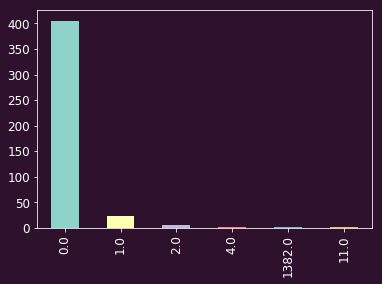

In [177]:
df_nyc.nkill.value_counts().plot(kind='bar', stacked=True)

In [142]:
# Who were the perpetrator groups of these attacks?

df_nyc.gname.value_counts()

Unknown                                               83
Fuerzas Armadas de Liberacion Nacional (FALN)         66
Jewish Defense League (JDL)                           44
Left-Wing Militants                                   26
Black Liberation Army                                 21
Armed Revolutionary Independence Movement (MIRA)      20
Omega-7                                               18
Independent Armed Revolutionary Commandos (CRIA)      16
Jewish Armed Resistance                               15
Weather Underground, Weathermen                       12
Black Nationalists                                    8 
May 19 Communist Order                                7 
Croatian Nationalists                                 7 
Anti-Muslim extremists                                6 
Black Panthers                                        5 
Puerto Rican Revolutionary Movement                   5 
Puerto Rican Armed Resistance                         5 
Secret Cuban Government        

In [145]:
# How about in 1970?

df_nyc_1970.gname.value_counts()

Left-Wing Militants                                   19
Unknown                                               19
Black Nationalists                                    8 
Weather Underground, Weathermen                       7 
Jewish Defense League (JDL)                           7 
Armed Revolutionary Independence Movement (MIRA)      6 
Student Radicals                                      4 
Black Panthers                                        3 
Revolutionary Force 9                                 3 
Puerto Rican Resistance Movement                      2 
White extremists                                      1 
The World United Formosans for Independence (WUFI)    1 
Stop the War Coalition                                1 
Cuban Action                                          1 
Name: gname, dtype: int64

In [12]:
# What were the most used weapons in NYC? 

df_nyc.weapsubtype1_txt.value_counts()

Unknown Explosive Type                       165
Time Fuse                                     39
Other Explosive Type                          33
Handgun                                       27
Molotov Cocktail/Petrol Bomb                  22
Gasoline or Alcohol                           22
Dynamite/TNT                                  19
Arson/Fire                                    15
Unknown Gun Type                               9
Vehicle                                        8
Rifle/Shotgun (non-automatic)                  6
Automatic Weapon                               6
Letter Bomb                                    6
Knife or Other Sharp Object                    3
Blunt Object                                   2
Hands, Feet, Fists                             2
Grenade                                        2
Projectile (rockets, mortars, RPGs, etc.)      2
Remote Trigger                                 2
Sticky Bomb                                    1
Name: weapsubtype1_t

## Back to the entire country

**In what year attacks killed the most in the US?** 

In [192]:
df_usa.groupby('iyear').nkill.sum().sort_values(ascending=False)

iyear
2001    1622.0
1995    170.0 
2016    68.0  
1973    45.0  
2015    44.0  
1970    33.0  
1975    24.0  
2013    23.0  
1971    20.0  
1999    20.0  
2014    19.0  
1979    18.0  
2009    18.0  
1974    16.0  
1980    15.0  
1982    11.0  
1972    10.0  
1994    10.0  
1983    8.0   
1981    8.0   
1978    8.0   
2012    7.0   
1990    5.0   
2010    4.0   
1998    4.0   
1977    4.0   
2002    4.0   
1976    4.0   
1985    3.0   
1984    3.0   
1989    3.0   
1991    2.0   
1996    2.0   
1997    2.0   
2008    2.0   
1992    2.0   
1986    1.0   
1987    1.0   
1988    1.0   
2006    1.0   
2000    0.0   
2011    0.0   
2003    0.0   
2004    0.0   
2005    0.0   
2007    0.0   
Name: nkill, dtype: float64

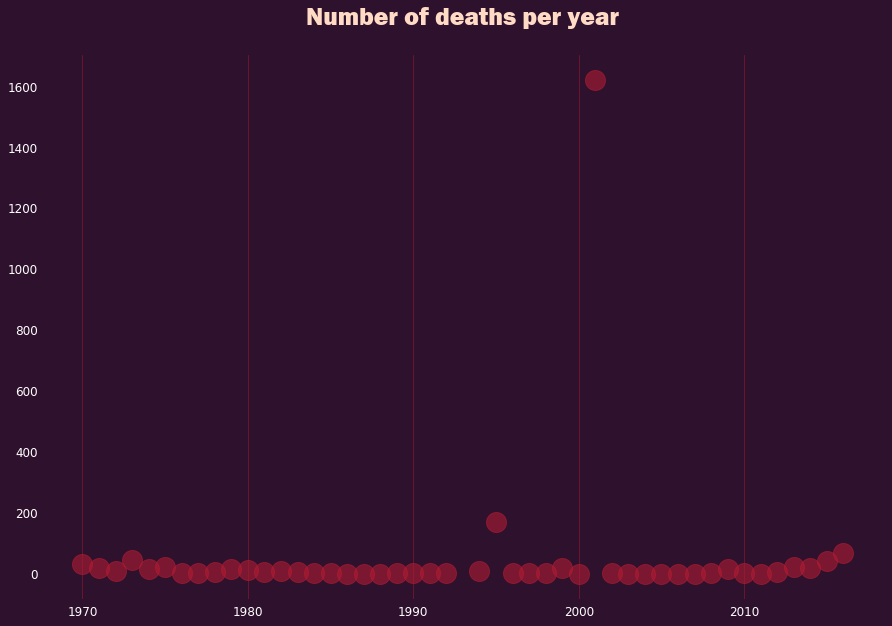

In [84]:
ax = df_usa.groupby('iyear').nkill.sum().plot(marker='o', linestyle='', color='#b01c33', markersize=20, alpha=0.6, figsize=(15,10))

ax.set_title('Number of deaths per year', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.label.set_visible(False)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("deaths-year.pdf")

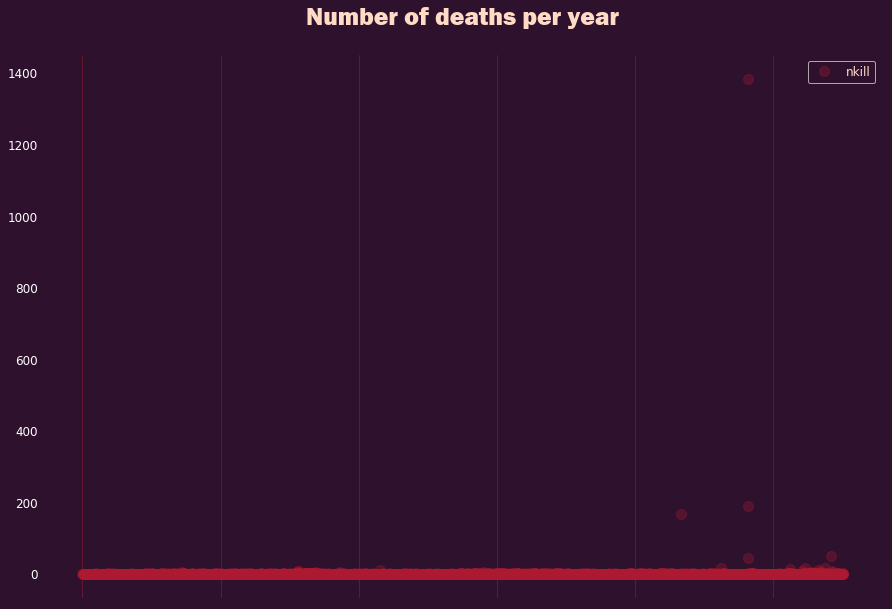

In [93]:
# each dot now is an attack. But it doesn't look very nice. Let's stick to the version per year.


ax = df_usa.plot(x='date', y='nkill', color='#b01c33', marker='o', linestyle='', markersize=10, alpha=0.3, figsize=(15,10))

ax.set_title('Number of deaths per year', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.label.set_visible(False)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

#plt.savefig("deaths-year.pdf")

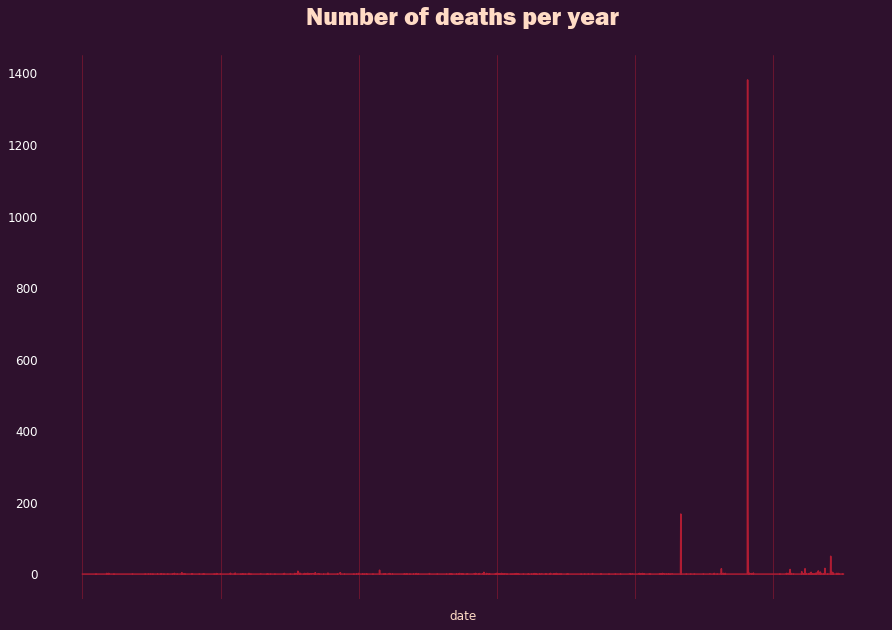

In [108]:
# let's try a line
# doesn't look very good either 

ax = df_usa.plot(kind='line', x='date', y='nkill', color='#b01c33', legend=False, figsize=(15,10))

ax.set_title('Number of deaths per year', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.label.set_visible(True)
ax.yaxis.label.set_visible(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

#plt.savefig("deaths-year.pdf")

**That was kind of obvious. 2001 has the highest number of deaths by far.**

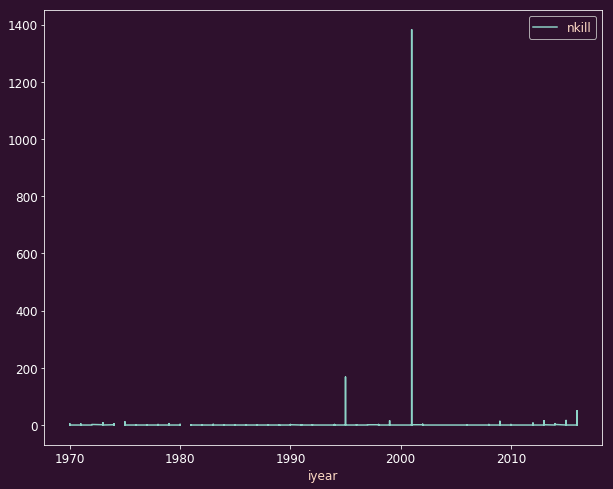

In [72]:
df_usa.plot(kind='line', x='iyear', y='nkill', figsize=(10,8))

**Let's look at types of weapons used in all five decades.**

Which ones were used more in the 70s? Which ones became more popular over the decades?

In [32]:
df_usa.groupby('iyear').weaptype1_txt.value_counts()

iyear  weaptype1_txt                                                              
1970   Explosives/Bombs/Dynamite                                                      280
       Incendiary                                                                     147
       Firearms                                                                        35
       Chemical                                                                         2
       Melee                                                                            2
       Fake Weapons                                                                     1
       Sabotage Equipment                                                               1
1971   Explosives/Bombs/Dynamite                                                      144
       Incendiary                                                                      75
       Firearms                                                                        24
       Melee     

In [114]:
df_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      1392
Incendiary                                                                      822
Firearms                                                                        373
Unknown                                                                          39
Melee                                                                            37
Biological                                                                       24
Chemical                                                                         21
Sabotage Equipment                                                               18
Other                                                                            17
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       8
Fake Weapons                                                                      5
Radiological                                                                

In [154]:
df_70_usa = df_70[df_70.country_txt == 'United States']
df_70_usa.to_csv("1970.csv")

In [155]:
df_80_usa = df_80[df_80.country_txt == 'United States']
df_80_usa.to_csv("1980.csv")

In [156]:
df_90_usa = df_90[df_90.country_txt == 'United States']
df_90_usa.to_csv("1990.csv")

In [157]:
df_00_usa = df_00[df_00.country_txt == 'United States']
df_00_usa.to_csv("2000.csv")

In [158]:
df_10_usa = df_10[df_10.country_txt == 'United States']
df_10_usa.to_csv("2010.csv")

In [38]:
df_70_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite    942
Incendiary                   315
Firearms                     170
Unknown                       17
Chemical                      11
Melee                         11
Fake Weapons                   3
Sabotage Equipment             1
Other                          1
Name: weaptype1_txt, dtype: int64

In [39]:
df_80_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite    277
Incendiary                   126
Firearms                      75
Unknown                       20
Sabotage Equipment             8
Biological                     4
Melee                          3
Chemical                       2
Other                          1
Radiological                   1
Name: weaptype1_txt, dtype: int64

In [40]:
df_90_usa.weaptype1_txt.value_counts()

Incendiary                   173
Explosives/Bombs/Dynamite     98
Firearms                      65
Other                         13
Melee                          9
Sabotage Equipment             5
Unknown                        2
Chemical                       2
Fake Weapons                   1
Name: weaptype1_txt, dtype: int64

In [41]:
df_00_usa.weaptype1_txt.value_counts()

Incendiary                                                                     125
Explosives/Bombs/Dynamite                                                       41
Biological                                                                      16
Firearms                                                                        10
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      7
Sabotage Equipment                                                               3
Melee                                                                            3
Chemical                                                                         2
Other                                                                            1
Fake Weapons                                                                     1
Name: weaptype1_txt, dtype: int64

In [42]:
df_10_usa.weaptype1_txt.value_counts()

Incendiary                                                                     83
Firearms                                                                       53
Explosives/Bombs/Dynamite                                                      34
Melee                                                                          11
Biological                                                                      4
Chemical                                                                        4
Other                                                                           1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     1
Sabotage Equipment                                                              1
Name: weaptype1_txt, dtype: int64

In [43]:
df_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      1392
Incendiary                                                                      822
Firearms                                                                        373
Unknown                                                                          39
Melee                                                                            37
Biological                                                                       24
Chemical                                                                         21
Sabotage Equipment                                                               18
Other                                                                            17
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       8
Fake Weapons                                                                      5
Radiological                                                                

**Now let's do the same thing for NYC.**

In [13]:
df_70_nyc = df_70[df_70.city == 'New York City']
df_70_nyc.weapsubtype1_txt.value_counts()

Unknown Explosive Type                       128
Time Fuse                                     32
Other Explosive Type                          23
Gasoline or Alcohol                           22
Handgun                                       20
Molotov Cocktail/Petrol Bomb                  15
Dynamite/TNT                                  10
Arson/Fire                                     9
Unknown Gun Type                               6
Automatic Weapon                               5
Vehicle                                        4
Rifle/Shotgun (non-automatic)                  4
Letter Bomb                                    3
Projectile (rockets, mortars, RPGs, etc.)      2
Blunt Object                                   2
Knife or Other Sharp Object                    1
Name: weapsubtype1_txt, dtype: int64

In [20]:
df_80_nyc = df_80[df_80.city == 'New York City']
df_80_nyc.weapsubtype1_txt.value_counts()

Unknown Explosive Type           31
Dynamite/TNT                      9
Other Explosive Type              5
Arson/Fire                        5
Time Fuse                         5
Vehicle                           3
Unknown Gun Type                  2
Rifle/Shotgun (non-automatic)     2
Handgun                           1
Molotov Cocktail/Petrol Bomb      1
Sticky Bomb                       1
Name: weapsubtype1_txt, dtype: int64

In [21]:
df_90_nyc = df_90[df_90.city == 'New York City']
df_90_nyc.weapsubtype1_txt.value_counts()

Unknown Explosive Type         6
Handgun                        4
Letter Bomb                    3
Other Explosive Type           3
Time Fuse                      2
Knife or Other Sharp Object    1
Automatic Weapon               1
Name: weapsubtype1_txt, dtype: int64

In [22]:
df_00_nyc = df_00[df_00.city == 'New York City']
df_00_nyc.weapsubtype1_txt.value_counts()

Grenade                 2
Other Explosive Type    1
Arson/Fire              1
Handgun                 1
Name: weapsubtype1_txt, dtype: int64

In [23]:
df_10_nyc = df_10[df_10.city == 'New York City']
df_10_nyc.weapsubtype1_txt.value_counts()

Molotov Cocktail/Petrol Bomb    6
Hands, Feet, Fists              2
Remote Trigger                  2
Knife or Other Sharp Object     1
Handgun                         1
Vehicle                         1
Unknown Gun Type                1
Other Explosive Type            1
Name: weapsubtype1_txt, dtype: int64

**Who were the most targeted groups?**

In [44]:
df_usa.groupby('targsubtype1_txt').targtype1_txt.value_counts().head(15).sort_values(ascending=False)

targsubtype1_txt                                      targtype1_txt                 
Clinics                                               Abortion Related                  239
Bank/Commerce                                         Business                          221
Embassy/Consulate                                     Government (Diplomatic)            63
Electricity                                           Utilities                          59
Diplomatic Personnel (outside of embassy, consulate)  Government (Diplomatic)            37
Airport                                               Airports & Aircraft                26
Domestic NGO                                          NGO                                24
Construction                                          Business                           23
Aircraft (not at an airport)                          Airports & Aircraft                16
Airline Officer/Personnel                             Airports & Aircraft              

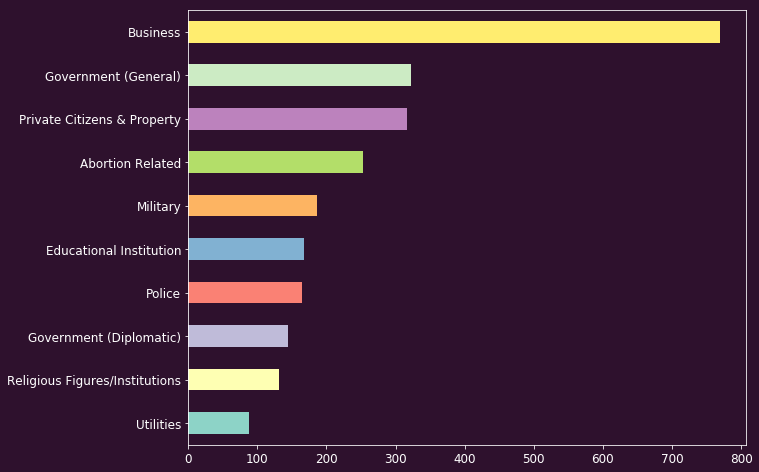

In [75]:
df_usa.targtype1_txt.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8)) 

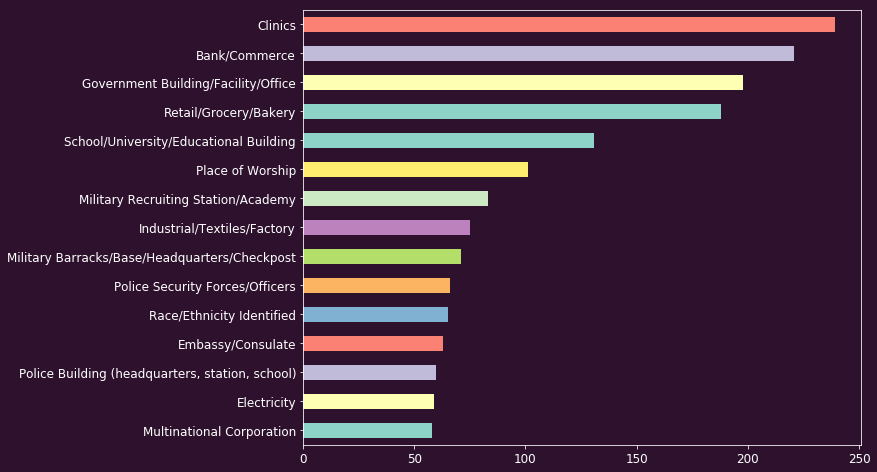

In [76]:
df_usa.targsubtype1_txt.value_counts().head(15).sort_values(ascending=True).plot(kind='barh', figsize=(10,8)) 

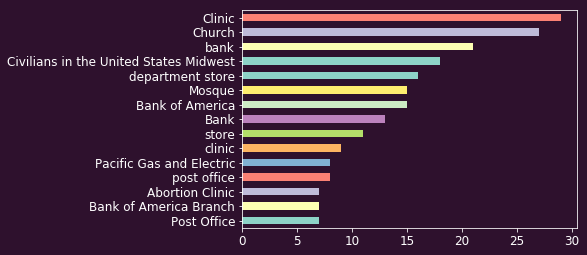

In [77]:
df_usa.target1.value_counts().head(15).sort_values(ascending=True).plot(kind='barh') 

**What were the motivations of these attacks?**

In [48]:
df_usa.motive.value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                               178
To kill police                                                                                                                                                                                                                                                                                                                                                                                                                                                         24
The specific motive for the attack is unknown.                                      

**What type of attacks were these?**

In [49]:
df_usa.attacktype1_txt.value_counts()

Bombing/Explosion                      1378
Facility/Infrastructure Attack          838
Armed Assault                           249
Assassination                           128
Hostage Taking (Barricade Incident)      59
Unarmed Assault                          58
Hostage Taking (Kidnapping)              20
Hijacking                                16
Unknown                                  11
Name: attacktype1_txt, dtype: int64

**What's the correlation between the perpetrator's nationality and the location of the attack?** 

Was the attack logistically international or domestic?

In [50]:
df_usa.INT_LOG.value_counts()

-9    1373
 0    1053
 1     331
Name: INT_LOG, dtype: int64

Looks like the majority is unknown (-9), more than 1,000 were domestic (0) and only 331 were international (1).